# MINI - PROJET : Technique de scoring

In [1]:
import os
# récupérer le chemin du répertoire courant
path = os.getcwd()
print("Le répertoire courant est : " + path)
# récupérer le nom du répertoire courant
repn = os.path.basename(path)
print("Le nom du répertoire est : " + repn)

Le répertoire courant est : C:\Users\DELL\Desktop\PROJETS\Mini_projet9_scoring_Reg_Lo
Le nom du répertoire est : Mini_projet9_scoring_Reg_Lo


# ANALYSE EXPLORATOIRE DES DONNES 
##   Importation des données
### La variable cible est : cb_person_default_on_file

In [2]:
### Importation des données 

import pandas as pd
import numpy as np
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
import matplotlib.pyplot as plt 
# %matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats.mstats import winsorize



In [3]:
df= pd.read_csv('file:///C:/Users/DELL/Desktop/Mini_Projet_8/credit_risk_dataset convert.csv' , sep=';')

## Préparation des données

In [4]:
# Afficher les 15 premières lignes
print(df.head(15))

    person_age  person_income person_home_ownership  person_emp_length  \
0           22          59000                  RENT              123.0   
1           21           9600                   OWN                5.0   
2           25           9600              MORTGAGE                1.0   
3           23          65500                  RENT                4.0   
4           24          54400                  RENT                8.0   
5           21           9900                   OWN                2.0   
6           26          77100                  RENT                8.0   
7           24          78956                  RENT                5.0   
8           24          83000                  RENT                8.0   
9           21          10000                   OWN                6.0   
10          22          85000                  RENT                6.0   
11          21          10000                   OWN                2.0   
12          23          95000         

In [5]:
# le nombre de lignes et de colonnes
df.shape

(32581, 12)

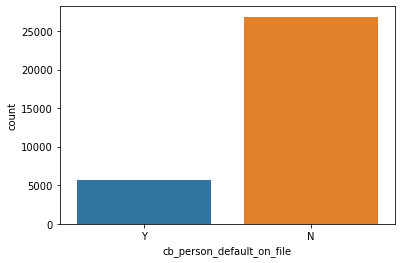

In [6]:
### Visualisation des données

import seaborn as sns
sns.countplot(x='cb_person_default_on_file',data=df);

##### Nous constatons un grand déséquilibre des classes de la variable cible en défaveur de la modalité Y, un 
##### rééchantillonnage sera nécessaire pour l''optimisation de la prévision

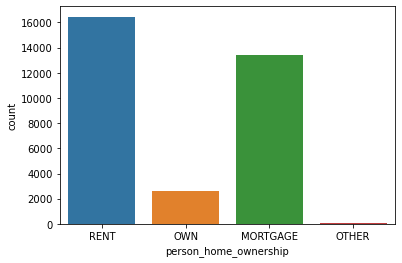

In [7]:
t1=sns.countplot(x='person_home_ownership',data=df);

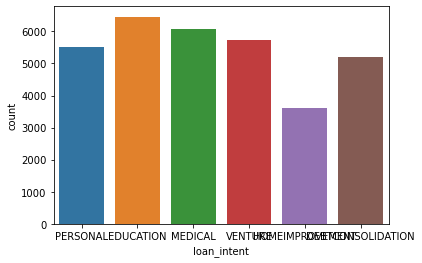

In [8]:
sns.countplot(x='loan_intent',data=df);

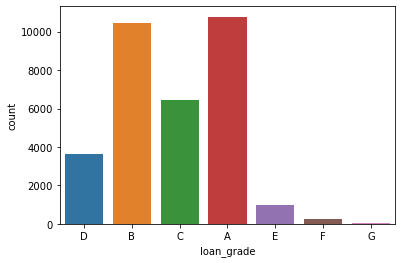

In [9]:
t2=sns.countplot(x='loan_grade',data=df);

In [10]:
# détection des valurs aberrantes

<AxesSubplot:ylabel='person_income'>

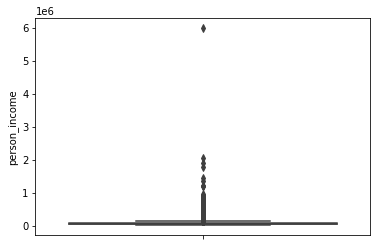

In [11]:
sns.boxplot(y='person_income',data=df)

<AxesSubplot:ylabel='person_emp_length'>

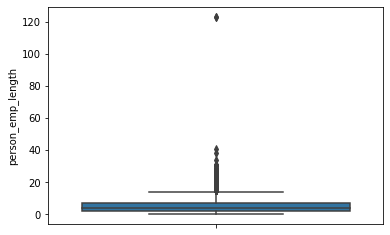

In [12]:
sns.boxplot(y='person_emp_length',data=df)

<AxesSubplot:ylabel='loan_amnt'>

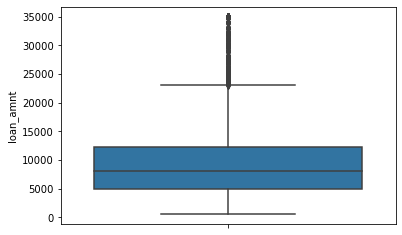

In [13]:
sns.boxplot(y='loan_amnt',data=df)

<AxesSubplot:ylabel='loan_int_rate'>

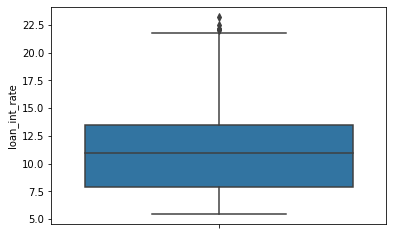

In [14]:
sns.boxplot(y='loan_int_rate',data=df)

<AxesSubplot:ylabel='person_age'>

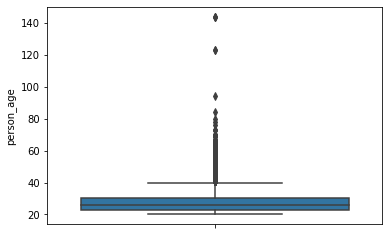

In [15]:
sns.boxplot(y='person_age',data=df)

<AxesSubplot:ylabel='loan_percent_income'>

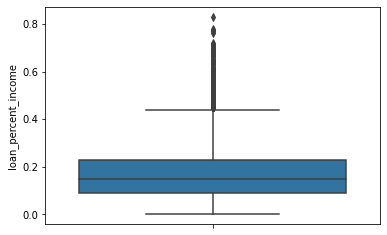

In [16]:
sns.boxplot(y='loan_percent_income',data=df)

##### Presque toutes les variables quantitatives contiennent des valeurs aberrantes, 
##### toutefois celles de la variable 'person_income' restent impressionnantes.

<AxesSubplot:xlabel='cb_person_default_on_file', ylabel='person_age'>

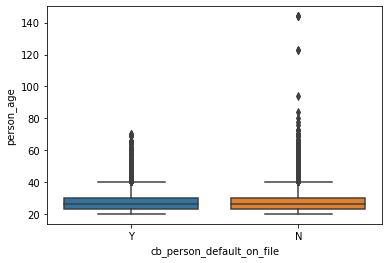

In [17]:

### Rélation entre âge et variable cible

sns.boxplot(x='cb_person_default_on_file',y='person_age',data=df)

# On constate une presque égalité des âges des deux sous groupes ayant réppndus par 'Y'et par 'N'

In [18]:
# Résumé statistique

df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [19]:
# valeurs manquantes
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [20]:
# seulement les variables person_emp_length et loan_int_rate ont des valeurs manquantes

df.fillna(value={'person_emp_length':df['person_emp_length'].mean()}, inplace=True)

df.fillna(value={'loan_int_rate':df['loan_int_rate'].mean()}, inplace=True)

#####   Encodage des variables qualitatives

In [21]:
# Les variables qualitatives sont person_home_ownership, loan_intent, loan_grade et cb_person_default_on_file

df['cb_person_default_on_file'].unique()

df['cb_person_default_on_file'].replace({'Y':1, 'N':0},inplace=True)

##### Traitement des variables qualitatives de plus de deux(2) modalités

In [22]:
## Cas de la variable person_home_ownership

df['person_home_ownership'].unique()

person_home_ownership_encode=pd.get_dummies(df['person_home_ownership'],drop_first=True) # Suppression de lacolinéarité enre les variables crées

person_home_ownership_encode

,OTHER,OWN,RENT
0,0,0,1
1,0,1,0
2,0,0,0
3,0,0,1
4,0,0,1
...,...,...,...
32576,0,0,0
32577,0,0,0
32578,0,0,1
32579,0,0,0


In [23]:
## Cas de la variable loan_intent

df['loan_intent'].unique()

loan_intent_encode=pd.get_dummies(df['loan_intent'],drop_first=True)

loan_intent_encode

,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,0,0,0,1,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
32576,0,0,0,1,0
32577,0,0,0,1,0
32578,0,1,0,0,0
32579,0,0,0,1,0


In [24]:
## Cas de la variable loan_grade

df['loan_grade'].unique()

loan_grade_encode=pd.get_dummies(df['loan_grade'],drop_first=True)

loan_grade_encode

,B,C,D,E,F,G
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
32576,0,1,0,0,0,0
32577,0,0,0,0,0,0
32578,1,0,0,0,0,0
32579,1,0,0,0,0,0


In [25]:
# supression des anciennes variables qualitatives dans le jeu de données

df.drop(['person_home_ownership','loan_intent','loan_grade'],axis=1,inplace=True)

df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,1,3
1,21,9600,5.0,1000,11.14,0,0.10,0,2
2,25,9600,1.0,5500,12.87,1,0.57,0,3
3,23,65500,4.0,35000,15.23,1,0.53,0,2
4,24,54400,8.0,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,0,30
32577,54,120000,4.0,17625,7.49,0,0.15,0,19
32578,65,76000,3.0,35000,10.99,1,0.46,0,28
32579,56,150000,5.0,15000,11.48,0,0.10,0,26


In [26]:
# Intégration des nouvelles variables encodées au jeu de données

df=pd.concat([df,person_home_ownership_encode,loan_intent_encode,loan_grade_encode],axis=1)
df.head(3)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,OTHER,...,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,B,C,D,E,F,G
0,22,59000,123.0,35000,16.02,1,0.59,1,3,0,...,0,0,1,0,0,0,1,0,0,0
1,21,9600,5.0,1000,11.14,0,0.10,0,2,0,...,0,0,0,0,1,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,0,3,0,...,0,1,0,0,0,1,0,0,0,0


In [27]:
# Caractéristiques du nouveau jeu de données
df.dtypes

person_age                      int64
person_income                   int64
person_emp_length             float64
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file       int64
cb_person_cred_hist_length      int64
OTHER                           uint8
OWN                             uint8
RENT                            uint8
EDUCATION                       uint8
HOMEIMPROVEMENT                 uint8
MEDICAL                         uint8
PERSONAL                        uint8
VENTURE                         uint8
B                               uint8
C                               uint8
D                               uint8
E                               uint8
F                               uint8
G                               uint8
dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


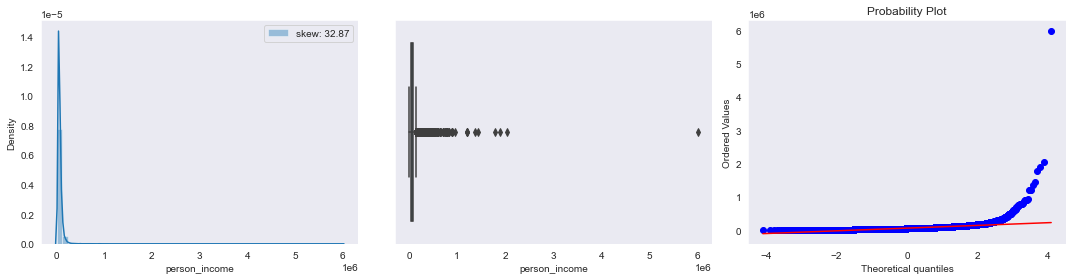

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


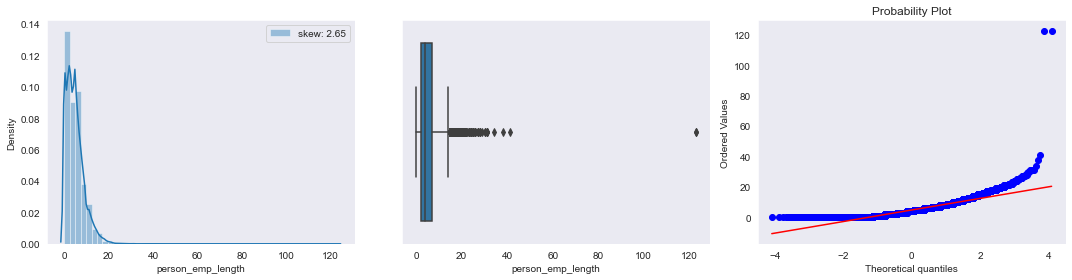

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


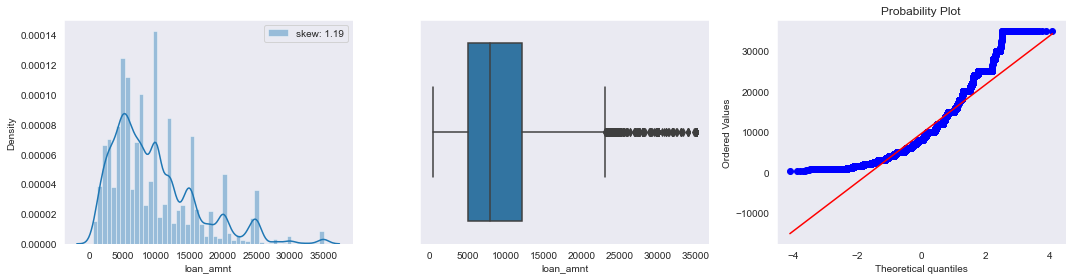

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


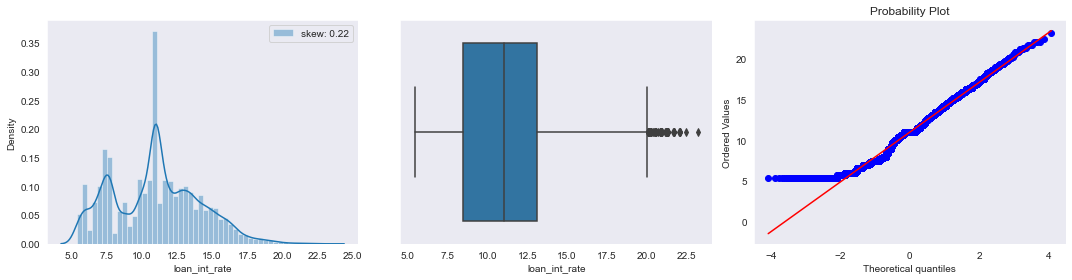

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


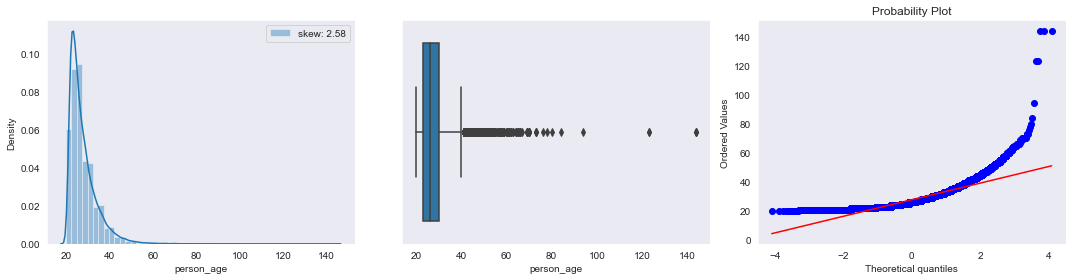

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


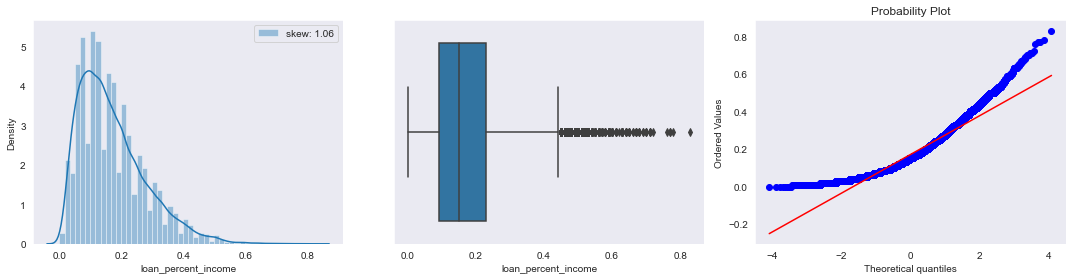

In [28]:
# Traitement des valeurs aberrantes
# L'écart des valeurs entre le troisième quartile et le maximum confirme une fois de plus l'existence de valeurs 
# extrêmes surtout pour les variables person_age,person_emp_length,loan_amnt et cb_person_cred_hist_length.

features=['person_income','person_emp_length','loan_amnt','loan_int_rate','person_age','loan_percent_income',]
features

sns.set_style('dark')
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col],label="skew: "+str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col],plot=plt)
    plt.tight_layout()
    plt.show()

##### On remarque l'existence de valeurs extrêtmes pour les variables 'person_income','person_emp_length','loan_amnt','loan_int_rate','person_age' et 'loan_percent_income'

In [29]:
# copie de la base dans un nouvel objet df_cap 
df_cap=df.copy()

In [30]:
    # Application de la méthode Z-SCORE pour le traitement des valeurs extrêmes

    def zscore_capping(df,cols,thr):
    
     for col in cols:
            
                mean=df[col].mean()
                std=df[col].std()
                lower_bound=mean-thr*std
                upper_bound=mean+thr*std
            
                df[col]=np.where(df[col]>upper_bound,upper_bound,np.where(df[col]<lower_bound,lower_bound,df[col]))

In [31]:
np.round(df.describe(),4)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,OTHER,...,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,B,C,D,E,F,G
count,32581.0000,3.258100e+04,32581.0000,32581.0000,32581.0000,32581.0000,32581.0000,32581.0000,32581.0000,32581.0000,...,32581.0000,32581.0000,32581.0000,32581.0000,32581.0000,32581.0000,32581.0000,32581.0000,32581.0000,32581.0000
mean,27.7346,6.607485e+04,4.7897,9589.3711,11.0117,0.2182,0.1702,0.1763,5.8042,0.0033,...,0.1106,0.1863,0.1695,0.1755,0.3208,0.1982,0.1113,0.0296,0.0074,0.0020
std,6.3481,6.198312e+04,4.0853,6322.0866,3.0816,0.4130,0.1068,0.3811,4.0550,0.0572,...,0.3137,0.3894,0.3752,0.3804,0.4668,0.3987,0.3145,0.1694,0.0857,0.0443
min,20.0000,4.000000e+03,0.0000,500.0000,5.4200,0.0000,0.0000,0.0000,2.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,23.0000,3.850000e+04,2.0000,5000.0000,8.4900,0.0000,0.0900,0.0000,3.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,26.0000,5.500000e+04,4.0000,8000.0000,11.0117,0.0000,0.1500,0.0000,4.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,30.0000,7.920000e+04,7.0000,12200.0000,13.1100,0.0000,0.2300,0.0000,8.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,144.0000,6.000000e+06,123.0000,35000.0000,23.2200,1.0000,0.8300,1.0000,30.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [32]:
zscore_capping(df_cap,features,3)

In [33]:
np.round(df_cap.describe(),4)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,OTHER,...,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,B,C,D,E,F,G
count,32581.0000,32581.0000,32581.0000,32581.0000,32581.0000,32581.0000,32581.0000,32581.0000,32581.0000,32581.0000,...,32581.0000,32581.0000,32581.0000,32581.0000,32581.0000,32581.0000,32581.0000,32581.0000,32581.0000,32581.0000
mean,27.6190,64572.5467,4.7501,9543.6780,11.0103,0.2182,0.1696,0.1763,5.8042,0.0033,...,0.1106,0.1863,0.1695,0.1755,0.3208,0.1982,0.1113,0.0296,0.0074,0.0020
std,5.7742,38877.4465,3.8489,6162.2345,3.0771,0.4130,0.1046,0.3811,4.0550,0.0572,...,0.3137,0.3894,0.3752,0.3804,0.4668,0.3987,0.3145,0.1694,0.0857,0.0443
min,20.0000,4000.0000,0.0000,500.0000,5.4200,0.0000,0.0000,0.0000,2.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,23.0000,38500.0000,2.0000,5000.0000,8.4900,0.0000,0.0900,0.0000,3.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,26.0000,55000.0000,4.0000,8000.0000,11.0117,0.0000,0.1500,0.0000,4.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,30.0000,79200.0000,7.0000,12200.0000,13.1100,0.0000,0.2300,0.0000,8.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,46.7788,252024.2060,17.0457,28555.6310,20.2565,1.0000,0.4905,1.0000,30.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [34]:
# Vérification de la tail du jeu de donées
df_cap.shape,df.shape

((32581, 23), (32581, 23))

In [35]:
    # Division de la base de données traitée 'df_cap'

    # Données d'apprentissage:60%
    # Données de test        :20%
    # Données de validation  :20%
    from sklearn.model_selection import train_test_split
    seed=111
    X=df_cap.drop('cb_person_default_on_file',axis=1)
    y=df_cap['cb_person_default_on_file']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=seed,stratify=y)
    
    X_val,X_test,y_val,y_test=train_test_split(X_test,y_test,test_size=0.5,random_state=seed,stratify=y_test)

In [36]:
# Vérifions la conservation des proportions de la variable cible dans  les differents jeux de données

y_train.value_counts(normalize=True)

y_test.value_counts(normalize=True)

y_val.value_counts(normalize=True)


0    0.823665
1    0.176335
Name: cb_person_default_on_file, dtype: float64

##### on observe la même distribution de la variable cible pour toutes les bases ci qui permet d'éviter des erreurs d'interprétations

In [37]:
# Réglage du problème de déséquilibre des classes

##### Nous constatons que pour la variable cible, la classe 'N' ou '0' est sur-représentée soit 82,36% 
##### des observations contre une sous représentation de la classe 'Y' ou '1'

In [38]:
    # Méthode de sur-échantionnage (de la classe 'Y')
    
    from sklearn.utils import resample
    
    X2=X_train
    X2['cb_person_default_on_file']=y_train.values
    X2.head(3)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,OTHER,OWN,...,MEDICAL,PERSONAL,VENTURE,B,C,D,E,F,G,cb_person_default_on_file
11746,25.0,75000.0,9.0,7500.0,12.610000,0,0.10,4,0,0,...,0,0,1,0,0,1,0,0,0,1
9953,24.0,65000.0,7.0,1525.0,5.420000,0,0.02,3,0,0,...,0,1,0,0,0,0,0,0,0,0
24713,33.0,74000.0,3.0,10000.0,11.011695,0,0.14,8,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
    # Définissons les classes minoritaires et majoritaires
    
    minority = X2[X2.cb_person_default_on_file == 1]
    majority = X2[X2.cb_person_default_on_file == 0]
    
    minority_upsampled = resample(minority,replace=True,n_samples=len(majority)) # tirage avec remise
    minority_upsampled

majority.shape

(16101, 23)

In [40]:
# Constituons une nouvelle base avec la variable cible équilibrée

basesurech=pd.concat([majority,minority_upsampled])
basesurech

basesurech['cb_person_default_on_file'].value_counts(normalize=True)

0    0.5
1    0.5
Name: cb_person_default_on_file, dtype: float64

##### la variable est dès à présent équilibrée et ne subie aucun problème de sous représentation d'une classe

In [41]:
# Les caractéristique du jeu d'entraînement de suréchantillonnage deviennent:

X_train_up=basesurech.drop('cb_person_default_on_file',axis=1)
y_train_up=basesurech['cb_person_default_on_file']

In [42]:
    # Méthode de sous-échantionnage (de la classe 'N')
 
    majority_downsampled=resample(majority,replace=False,n_samples=len(minority))
    majority_downsampled

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,OTHER,OWN,...,MEDICAL,PERSONAL,VENTURE,B,C,D,E,F,G,cb_person_default_on_file
17150,23.0,60000.0,2.0,5000.0,6.910000,0,0.08,3,0,0,...,0,0,0,0,0,0,0,0,0,0
20721,32.0,36000.0,2.0,5000.0,11.830000,0,0.14,10,0,0,...,0,0,1,1,0,0,0,0,0,0
976,24.0,44000.0,6.0,18000.0,12.180000,1,0.41,2,0,0,...,0,0,1,1,0,0,0,0,0,0
25167,31.0,80004.0,9.0,3500.0,12.610000,0,0.04,10,0,0,...,1,0,0,0,1,0,0,0,0,0
31360,45.0,90000.0,3.0,2500.0,11.990000,0,0.03,13,0,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7272,25.0,18000.0,2.0,6500.0,11.011695,1,0.36,3,0,0,...,1,0,0,0,0,0,0,0,0,0
29118,30.0,52000.0,4.0,14675.0,9.630000,0,0.28,7,0,0,...,0,0,0,1,0,0,0,0,0,0
20520,28.0,49000.0,6.0,4800.0,15.990000,1,0.10,5,0,0,...,0,0,0,0,0,1,0,0,0,0
9357,24.0,55200.0,8.0,9600.0,10.780000,1,0.17,4,0,0,...,0,0,0,0,1,0,0,0,0,0


In [43]:
    # Concaténation

    basesousech=pd.concat([majority_downsampled,minority])
    basesousech

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,OTHER,OWN,...,MEDICAL,PERSONAL,VENTURE,B,C,D,E,F,G,cb_person_default_on_file
17150,23.0,60000.0,2.0,5000.0,6.91,0,0.08,3,0,0,...,0,0,0,0,0,0,0,0,0,0
20721,32.0,36000.0,2.0,5000.0,11.83,0,0.14,10,0,0,...,0,0,1,1,0,0,0,0,0,0
976,24.0,44000.0,6.0,18000.0,12.18,1,0.41,2,0,0,...,0,0,1,1,0,0,0,0,0,0
25167,31.0,80004.0,9.0,3500.0,12.61,0,0.04,10,0,0,...,1,0,0,0,1,0,0,0,0,0
31360,45.0,90000.0,3.0,2500.0,11.99,0,0.03,13,0,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22908,35.0,60000.0,12.0,16000.0,15.96,0,0.27,5,0,0,...,1,0,0,0,1,0,0,0,0,1
14429,26.0,106000.0,9.0,10000.0,15.33,0,0.09,3,0,0,...,0,0,0,0,0,1,0,0,0,1
29235,39.0,100300.0,2.0,25000.0,15.70,1,0.21,16,0,0,...,1,0,0,0,0,1,0,0,0,1
29699,44.0,37000.0,0.0,3500.0,12.87,0,0.09,13,0,0,...,1,0,0,0,1,0,0,0,0,1


In [44]:
# Les caractéristique du jeu d'entraînement de souséchantillonnage deviennent:

X_train_down=basesousech.drop('cb_person_default_on_file',axis=1)
y_train_down=basesousech['cb_person_default_on_file']

# Construisons un modèle de prédiction de la probabilité de défaut par un modèle optimalement calibré de régression logistique

# Modélisation et choix des algorithmes

### Sélection des variables importantes 


In [45]:
#  (construction d'un modèle de forêt aléatoire)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier(random_state=seed)
rf.fit(X_train_up,y_train_up)
accuracy_score(y_val,rf.predict(X_val))

0.8307243707796194

In [46]:
print(X_train_up.columns)
print(rf.feature_importances_)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'OTHER', 'OWN', 'RENT', 'EDUCATION',
       'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE', 'B', 'C', 'D', 'E',
       'F', 'G'],
      dtype='object')
[0.03805554 0.05827484 0.03778922 0.05128595 0.33041123 0.01983743
 0.04756345 0.03441655 0.00059091 0.00345661 0.00777675 0.00623445
 0.00468557 0.00604061 0.00574198 0.00595459 0.1024041  0.1406916
 0.07368606 0.01928683 0.00430871 0.00150702]


In [47]:
#Rangement par ordre d'importance
varimp=pd.Series(rf.feature_importances_,index=X_train_up.columns).sort_values(ascending=False)
varimp

loan_int_rate                 0.330411
C                             0.140692
B                             0.102404
D                             0.073686
person_income                 0.058275
loan_amnt                     0.051286
loan_percent_income           0.047563
person_age                    0.038056
person_emp_length             0.037789
cb_person_cred_hist_length    0.034417
loan_status                   0.019837
E                             0.019287
RENT                          0.007777
EDUCATION                     0.006234
MEDICAL                       0.006041
VENTURE                       0.005955
PERSONAL                      0.005742
HOMEIMPROVEMENT               0.004686
F                             0.004309
OWN                           0.003457
G                             0.001507
OTHER                         0.000591
dtype: float64

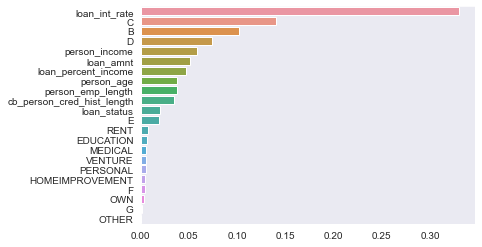

In [48]:
# Illustration par un graphique 
sns.barplot(x=varimp,y=varimp.index)
plt.show()

##### Nous décidons de conserver toutes les varibles (ce qui reste un avantage en machine learning)

## Evaluation des performances et choix du modèle le plus performant en terme de pouvoir prédictif

### Montage et calibrage

In [49]:
# Le choix des Algorithmes
# Régression logistique

# Entrainement de modèles et détermination des hyperparamètres avec les caractéristique du jeu d'entraînement de suréchantillonnage.:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr=LogisticRegression(random_state=seed,max_iter=500)
lr_hyp={'C':[0.001,0.01,0.1,1,10,100]}
lr_cv=GridSearchCV(lr,lr_hyp,cv=5)
lr_cv.fit(X_train_up,y_train_up)# entrainement 

print(lr_cv.best_score_)
print(lr_cv.best_estimator_) 



0.73303123140672
LogisticRegression(C=1, max_iter=500, random_state=111)


In [50]:
from sklearn.metrics import precision_score
from sklearn.metrics import brier_score_loss, roc_auc_score
logreg1 = LogisticRegression()
logreg1.fit(X_train_up,y_train_up)
y_pre1 = logreg1.predict(X_test)
AC= accuracy_score(y_test,y_pre1)
PS= precision_score(y_test, y_pre1, average="macro")
print("precision score1 : ",PS)
print("accuracy score1 : ",AC)

precision score1 :  0.7017667346445946
accuracy score1 :  0.7882461255178763


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
roc_auc_score(y_test,y_pre1 )

0.8075034307030412

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_test, y_pre1)
print(confusion_matrix1)

[[4175 1193]
 [ 187  962]]


##### Il ressort que nous avons 4175+962 prédictions correctes contre 1193+187 prédictions incorrectes soit 5137 contre 1380

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pre1))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      5368
           1       0.45      0.84      0.58      1149

    accuracy                           0.79      6517
   macro avg       0.70      0.81      0.72      6517
weighted avg       0.87      0.79      0.81      6517



In [54]:
# Le choix des Algorithmes

### Entrainement de modèles et détermination des hyperparamètres avec les caractéristique du jeu d'entraînement de souséchantillonnage.:
# Régression logistique
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr=LogisticRegression(random_state=seed,max_iter=500)
lr_hyp={'C':[0.001,0.01,0.1,1,10,100]}
lr_cv=GridSearchCV(lr,lr_hyp,cv=5)
lr_cv.fit(X_train_down,y_train_down)# entrainement 

print(lr_cv.best_score_)
print(lr_cv.best_estimator_) 

0.5896304825334612
LogisticRegression(C=0.1, max_iter=500, random_state=111)


In [55]:
from sklearn.metrics import precision_score
logreg2 = LogisticRegression()
logreg2.fit(X_train_down,y_train_down)
y_pre2= logreg2.predict(X_test)
AC= accuracy_score(y_test,y_pre2)
PS= precision_score(y_test, y_pre2, average="macro")
print("precision score2 : ",PS)
print("accuracy score2 : ",AC)


precision score2 :  0.5069243548071869
accuracy score2 :  0.47920822464324075


In [56]:
roc_auc_score(y_test,y_pre2 )

0.5118330881904696

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(y_test, y_pre2)
print(confusion_matrix2)

[[2477 2891]
 [ 503  646]]


##### Il ressort que nous avons 2477+646 prédictions correctes contre 503+2891 prédictions incorrectes soit 3123 contre 3394

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pre2))

              precision    recall  f1-score   support

           0       0.83      0.46      0.59      5368
           1       0.18      0.56      0.28      1149

    accuracy                           0.48      6517
   macro avg       0.51      0.51      0.43      6517
weighted avg       0.72      0.48      0.54      6517



### Pour former le classificateur calibré, nous commençons avec le même LogisticRegression mais le formons en utilisant uniquement le sous-ensemble de données de train (60% échantillons) puis calibrons, avec method='sigmoid', en utilisant le sous-ensemble de données de validation (20% échantillons) dans un processus en 2 étapes.

##### Calibrons le modèle pour l'optimisation des paramettres en vu d'une amélioration de la précision

##### Cas du modèle d'entrainement avec suréchantillonnage (X_train_up et y_train_up )

In [59]:
    from sklearn.model_selection import train_test_split
    seed=111
    X=df_cap.drop('cb_person_default_on_file',axis=1)
    y=df_cap['cb_person_default_on_file']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=seed,stratify=y)
    
    X_val,X_test,y_val,y_test=train_test_split(X_test,y_test,test_size=0.5,random_state=seed,stratify=y_test)

In [60]:
from sklearn.calibration import CalibratedClassifierCV 
calib_model_up = CalibratedClassifierCV(lr, method='sigmoid', cv=5)
calib_model_up.fit(X_train_up, y_train_up) 
prob_up = calib_model_up.predict_proba(X_test)[:, 1]

In [61]:
from sklearn.calibration import calibration_curve

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\calibration.py:964: FutureWarning: The normalize argument is deprecated in v1.1 and will be removed in v1.3. Explicitly normalizing y_prob will reproduce this behavior, but it is recommended that a proper probability is used (i.e. a classifier's `predict_proba` positive class or `decision_function` output calibrated with `CalibratedClassifierCV`).
  warnings.warn(


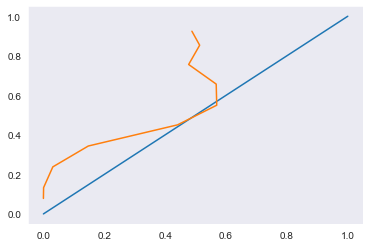

In [62]:
# Graph de curve de calibration
x_p, y_p = calibration_curve(y_test, prob_up, n_bins=10, normalize='True') 
plt.plot([0, 1], [0, 1]) 
plt.plot(x_p, y_p) 
plt.show()

In [63]:
from sklearn.metrics import brier_score_loss, roc_auc_score

y_pred_up = calib_model_up.predict(X_test)
brier_score_loss(y_test, y_pred_up, pos_label=2)
roc_auc_score(y_test, y_pred_up)

0.8756854110163831

In [64]:
AC_up= accuracy_score(y_test,y_pred_up)
AC_up

0.8284486727021636

##### Cas du modèle d'entrainement avec souséchantillonnage (X_train_down et y_train_down )

In [65]:
from sklearn.calibration import CalibratedClassifierCV 
calib_model_down = CalibratedClassifierCV(lr, method='sigmoid', cv=5)
calib_model_down.fit(X_train_down, y_train_down) 
prob_down = calib_model_down.predict_proba(X_test)[:, 1]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\calibration.py:964: FutureWarning: The normalize argument is deprecated in v1.1 and will be removed in v1.3. Explicitly normalizing y_prob will reproduce this behavior, but it is recommended that a proper probability is used (i.e. a classifier's `predict_proba` positive class or `decision_function` output calibrated with `CalibratedClassifierCV`).
  warnings.warn(


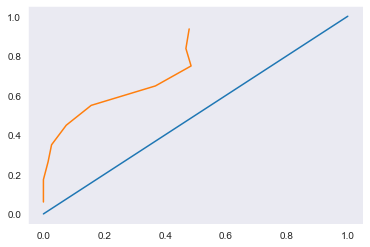

In [66]:
# Graph de curve de calibration
x_p, y_p = calibration_curve(y_test, prob_down, n_bins=10, normalize='True') 
plt.plot([0, 1], [0, 1]) 
plt.plot(x_p, y_p) 
plt.show()

In [67]:
from sklearn.metrics import brier_score_loss, roc_auc_score

y_pred_down = calib_model_down.predict(X_test)
brier_score_loss(y_test, y_pred_down, pos_label=2)
roc_auc_score(y_test, y_pred_down)

0.7694727255865594

In [68]:
AC_down= accuracy_score(y_test,y_pred_down)
AC_down

0.7577106030382078

##### On remarque que la calibration du modèle a permis l'amélioration des scores roc_auc_score

##### On retient le meilleur modèle à savoir celui construit à partir du modèle d'entrainement avec souséchantillonnage (X_train_up et y_train_up ) qui affiche un AUC de 0,8756; il détient également le meilleur score global(Accuracy=0,8284).
##### Le modèle détient à la fois le meilleur score global ainsi que le meilleur pouvoir discriminent.

# Utilisons les résultats du modèle final pour calculer des scores calibrés sur 1000

##### Le modèle final est: calib_model_up

In [90]:
 X_cal=df_cap.drop('cb_person_default_on_file',axis=1)

In [91]:
# Détermination de la probabilité de defaut

In [92]:
y_cal_1000=calib_model_up.predict_proba(df_cap[X_cal.columns])[:,1]

In [93]:
y_cal_1000

array([0.73022604, 0.20913781, 0.74638836, ..., 0.25710562, 0.20769702,
       0.21951903])

In [94]:
df2=pd.DataFrame(y_cal_1000)

In [95]:
df3=df2

In [96]:
df3['Probabilité_defaut']=df3

In [97]:
df4=pd.DataFrame(data=df3['Probabilité_defaut'],columns=['Probabilité_defaut'],index=df_cap.index)
df4

,Probabilité_defaut
0,0.730226
1,0.209138
2,0.746388
3,0.793369
4,0.785931
...,...
32576,0.770229
32577,0.219099
32578,0.257106
32579,0.207697


#### Rajout de la probabilité de defaut au jeu de données df_cap

In [98]:
df_fusion=pd.concat([df_cap,df4],axis=1)

In [99]:
df_fusion

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,OTHER,...,MEDICAL,PERSONAL,VENTURE,B,C,D,E,F,G,Probabilité_defaut
0,22.000000,59000.0,17.045686,28555.631043,16.02,1,0.490549,1,3,0,...,0,1,0,0,0,1,0,0,0,0.730226
1,21.000000,9600.0,5.000000,1000.000000,11.14,0,0.100000,0,2,0,...,0,0,0,1,0,0,0,0,0,0.209138
2,25.000000,9600.0,1.000000,5500.000000,12.87,1,0.490549,0,3,0,...,1,0,0,0,1,0,0,0,0,0.746388
3,23.000000,65500.0,4.000000,28555.631043,15.23,1,0.490549,0,2,0,...,1,0,0,0,1,0,0,0,0,0.793369
4,24.000000,54400.0,8.000000,28555.631043,14.27,1,0.490549,1,4,0,...,1,0,0,0,1,0,0,0,0,0.785931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,46.778835,53000.0,1.000000,5800.000000,13.16,0,0.110000,0,30,0,...,0,1,0,0,1,0,0,0,0,0.770229
32577,46.778835,120000.0,4.000000,17625.000000,7.49,0,0.150000,0,19,0,...,0,1,0,0,0,0,0,0,0,0.219099
32578,46.778835,76000.0,3.000000,28555.631043,10.99,1,0.460000,0,28,0,...,0,0,0,1,0,0,0,0,0,0.257106
32579,46.778835,150000.0,5.000000,15000.000000,11.48,0,0.100000,0,26,0,...,0,1,0,1,0,0,0,0,0,0.207697


### Calcul des scores calibrés sur 1000. Le score est calculé à partir de la probabilité de defaut de telle sorte qu'un score élevé typifie un client fiable et donc solvable correspondant aussi à une faible probabilité de deafut 

In [100]:
df_fusion['Score/1000']=df_fusion.apply(lambda row:round((1-row.Probabilité_defaut)*1000,0),axis=1)

In [101]:
df_fusion

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,OTHER,...,PERSONAL,VENTURE,B,C,D,E,F,G,Probabilité_defaut,Score/1000
0,22.000000,59000.0,17.045686,28555.631043,16.02,1,0.490549,1,3,0,...,1,0,0,0,1,0,0,0,0.730226,270.0
1,21.000000,9600.0,5.000000,1000.000000,11.14,0,0.100000,0,2,0,...,0,0,1,0,0,0,0,0,0.209138,791.0
2,25.000000,9600.0,1.000000,5500.000000,12.87,1,0.490549,0,3,0,...,0,0,0,1,0,0,0,0,0.746388,254.0
3,23.000000,65500.0,4.000000,28555.631043,15.23,1,0.490549,0,2,0,...,0,0,0,1,0,0,0,0,0.793369,207.0
4,24.000000,54400.0,8.000000,28555.631043,14.27,1,0.490549,1,4,0,...,0,0,0,1,0,0,0,0,0.785931,214.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,46.778835,53000.0,1.000000,5800.000000,13.16,0,0.110000,0,30,0,...,1,0,0,1,0,0,0,0,0.770229,230.0
32577,46.778835,120000.0,4.000000,17625.000000,7.49,0,0.150000,0,19,0,...,1,0,0,0,0,0,0,0,0.219099,781.0
32578,46.778835,76000.0,3.000000,28555.631043,10.99,1,0.460000,0,28,0,...,0,0,1,0,0,0,0,0,0.257106,743.0
32579,46.778835,150000.0,5.000000,15000.000000,11.48,0,0.100000,0,26,0,...,1,0,1,0,0,0,0,0,0.207697,792.0


#### Base des score calibrés sur 1000

In [102]:
df_score=pd.DataFrame(df_fusion,columns=['Probabilité_defaut','Score/1000'])

In [103]:
df_score

,Probabilité_defaut,Score/1000
0,0.730226,270.0
1,0.209138,791.0
2,0.746388,254.0
3,0.793369,207.0
4,0.785931,214.0
...,...,...
32576,0.770229,230.0
32577,0.219099,781.0
32578,0.257106,743.0
32579,0.207697,792.0


# Utilisons les scores pour définir trois niveaux de risque en faisant une notation selon la grille de notation suivante (A pour clients à faible risque jusqu’à C pour clients à risque très élevé)

### Résumé statistique de la base fusionnée

In [104]:
df_fusion.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,OTHER,...,PERSONAL,VENTURE,B,C,D,E,F,G,Probabilité_defaut,Score/1000
count,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,...,32581.000000,32581.000000,32581.00000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.619029,64572.546729,4.750113,9543.677992,11.010285,0.218164,0.169594,0.176330,5.804211,0.003284,...,0.169455,0.175532,0.32077,0.198214,0.111292,0.029588,0.007397,0.001964,0.386001,614.000031
std,5.774188,38877.446490,3.848918,6162.234537,3.077072,0.413006,0.104588,0.381106,4.055001,0.057214,...,0.375159,0.380427,0.46678,0.398660,0.314498,0.169450,0.085688,0.044278,0.220207,220.206075
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.156609,190.000000
25%,23.000000,38500.000000,2.000000,5000.000000,8.490000,0.000000,0.090000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.214084,347.000000
50%,26.000000,55000.000000,4.000000,8000.000000,11.011695,0.000000,0.150000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.244740,755.000000
75%,30.000000,79200.000000,7.000000,12200.000000,13.110000,0.000000,0.230000,0.000000,8.000000,0.000000,...,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.653051,786.000000
max,46.778835,252024.205974,17.045686,28555.631043,20.256509,1.000000,0.490549,1.000000,30.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.809616,843.000000


### Création des classes (grilles de notations)

In [105]:
def alert(c):
    if c['Probabilité_defaut'] > 0.8:
        return 'CCC'
    elif 0.7 < c['Probabilité_defaut']<= 0.8:
        return 'CC'
    elif 0.6 < c['Probabilité_defaut']<= 0.7:
        return 'C'
    elif 0.5 < c['Probabilité_defaut']<= 0.6:
        return 'BBB'
    elif 0.4 < c['Probabilité_defaut']<= 0.5:
        return 'BB'
    elif 0.3 < c['Probabilité_defaut']<= 0.4:
        return 'B'
    elif 0.2 < c['Probabilité_defaut']<= 0.3:
        return 'AAA'
    elif 0.1 < c['Probabilité_defaut']<= 0.2:
        return 'AA'
    else:
        return 'A'

In [106]:
df_fusion['grille_de_notation']=df_fusion.apply(alert,axis=1)

In [107]:
df_fusion

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,OTHER,...,VENTURE,B,C,D,E,F,G,Probabilité_defaut,Score/1000,grille_de_notation
0,22.000000,59000.0,17.045686,28555.631043,16.02,1,0.490549,1,3,0,...,0,0,0,1,0,0,0,0.730226,270.0,CC
1,21.000000,9600.0,5.000000,1000.000000,11.14,0,0.100000,0,2,0,...,0,1,0,0,0,0,0,0.209138,791.0,AAA
2,25.000000,9600.0,1.000000,5500.000000,12.87,1,0.490549,0,3,0,...,0,0,1,0,0,0,0,0.746388,254.0,CC
3,23.000000,65500.0,4.000000,28555.631043,15.23,1,0.490549,0,2,0,...,0,0,1,0,0,0,0,0.793369,207.0,CC
4,24.000000,54400.0,8.000000,28555.631043,14.27,1,0.490549,1,4,0,...,0,0,1,0,0,0,0,0.785931,214.0,CC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,46.778835,53000.0,1.000000,5800.000000,13.16,0,0.110000,0,30,0,...,0,0,1,0,0,0,0,0.770229,230.0,CC
32577,46.778835,120000.0,4.000000,17625.000000,7.49,0,0.150000,0,19,0,...,0,0,0,0,0,0,0,0.219099,781.0,AAA
32578,46.778835,76000.0,3.000000,28555.631043,10.99,1,0.460000,0,28,0,...,0,1,0,0,0,0,0,0.257106,743.0,AAA
32579,46.778835,150000.0,5.000000,15000.000000,11.48,0,0.100000,0,26,0,...,0,1,0,0,0,0,0,0.207697,792.0,AAA


### Création d'un nouveau jeu de données pour l'affichage des individus avec les grille de notation

In [108]:
df_final=pd.DataFrame(df_fusion,columns=['Probabilité_defaut','grille_de_notation'])

In [109]:
df_final

,Probabilité_defaut,grille_de_notation
0,0.730226,CC
1,0.209138,AAA
2,0.746388,CC
3,0.793369,CC
4,0.785931,CC
...,...,...
32576,0.770229,CC
32577,0.219099,AAA
32578,0.257106,AAA
32579,0.207697,AAA


##### Informations supplémentaires

In [110]:
pd.crosstab(df_final.grille_de_notation,"freq")

col_0,freq
grille_de_notation,
AA,1843
AAA,18321
B,1194
BB,470
BBB,1119
C,3882
CC,5750
CCC,2


#### Dans ce lot de 1000 individus choisis, on peut constater une forte présence des catégories excepté la B et la CCC.